In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import keras_ocr
import math
%matplotlib inline

Looking for C:\Users\Chris\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\Chris\.keras-ocr\crnn_kurapan.h5


<AxesSubplot:>

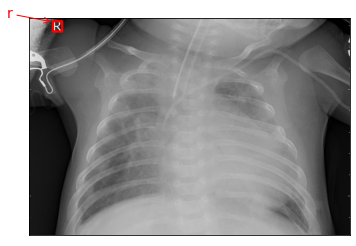

In [2]:
pipeline = keras_ocr.pipeline.Pipeline()

img = keras_ocr.tools.read('test.jpg')

prediction_groups = pipeline.recognize([img])

keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])

In [3]:
prediction_groups[0][0]

('r',
 array([[70., 12.],
        [97., 12.],
        [97., 42.],
        [70., 42.]], dtype=float32))

In [4]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read(img_path)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(img)

ValueError: operands could not be broadcast together with shapes (1280,1888) (3,) (1280,1888) 

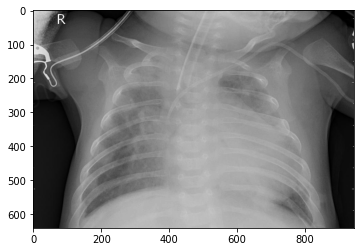

In [6]:
img = cv2.imread('test.jpg',0)

plt.imshow(img, cmap='gray')

test = inpaint_text(img, pipeline)

plt.imshow(test, cmap='gray')

In [ ]:
# display figure 1, fig 1 size = 812 x 639
img = cv2.imread('test.jpeg',0)



# check image size
print(img.size)
print(img)

plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')

In [ ]:
img2 = cv2.imread('test.jpeg',0)
mask = cv2.threshold(img2, 210, 255, cv2.THRESH_BINARY)[1][:,:]
dst = cv2.inpaint(img2, mask, 7, cv2.INPAINT_NS)

plt.figure(figsize=(10,10))
plt.imshow(mask, cmap='gray')
plt.show()  

plt.figure(figsize=(10,10))
plt.imshow(dst, cmap='gray')
plt.show()  

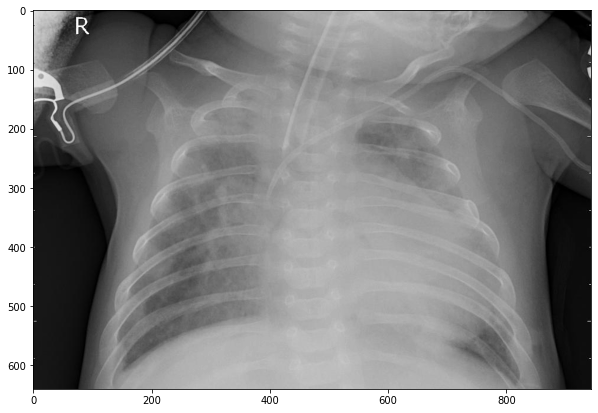

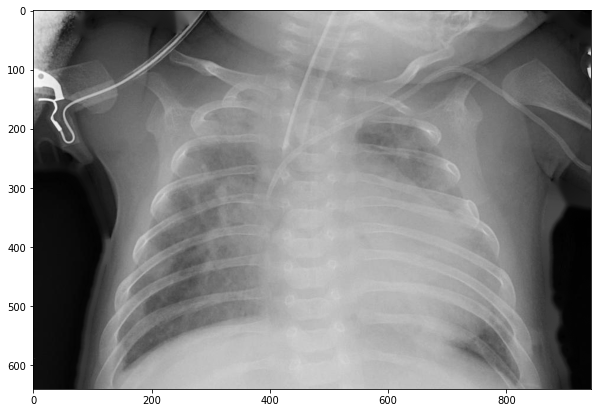

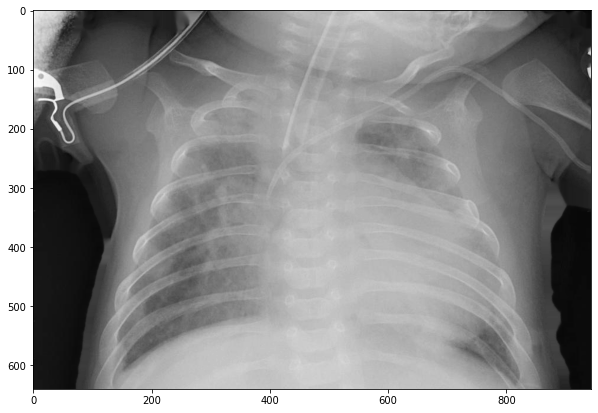

In [9]:
image = cv2.imread('test.jpeg', 0)

plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')
plt.show() 

sat = image[:,:]

thresh = cv2.threshold(sat, 10, 255, cv2.THRESH_BINARY)[1]
thresh = 255 - thresh

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)

result1 = cv2.inpaint(img,thresh,11,cv2.INPAINT_TELEA)
result2 = cv2.inpaint(img,thresh,11,cv2.INPAINT_NS)

plt.figure(figsize=(10,10))
plt.imshow(result1, cmap='gray')
plt.show() 

plt.figure(figsize=(10,10))
plt.imshow(result2, cmap='gray')
plt.show() 